In [1]:
# Name : Dimpal Lad
# CWID : 20023001
# Question No : 05

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the dataset
filename = 'C:/Users/dimpa/OneDrive - stevens.edu/CS-513/KDD_FinalExam/Adult_income_v2.csv'
df = pd.read_csv(filename)
print(df.dtypes)

Age                      int64
Education_Years          int64
Gender                  object
Hours_worked_Perweek     int64
Income                  object
dtype: object


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [Age, Education_Years, Gender, Hours_worked_Perweek, Income]
Index: []


In [5]:
# Encode 'Gender' column using LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [6]:
# Select features and target variable
features = df[['Education_Years', 'Gender', 'Hours_worked_Perweek']]
target = df['Income']

In [7]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [8]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=32)

In [9]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,splitter='best',max_leaf_nodes=5)

In [10]:
model.fit(X_train,y_train)
target_pred = model.predict(X_test)

In [11]:
print(f"\n Accuracy: {accuracy_score(y_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
cm = confusion_matrix(y_test,target_pred)
print(cm)
print(f"\n Classification Report:")
print(classification_report(y_test,target_pred))


 Accuracy: 0.7871621621621622  

 Confusion Matrix:
[[2234  241]
 [ 452  329]]

 Classification Report:
              precision    recall  f1-score   support

       <=50K       0.83      0.90      0.87      2475
        >50K       0.58      0.42      0.49       781

    accuracy                           0.79      3256
   macro avg       0.70      0.66      0.68      3256
weighted avg       0.77      0.79      0.77      3256



[Text(0, 0.5, '<=50K'), Text(0, 1.5, '>50K')]

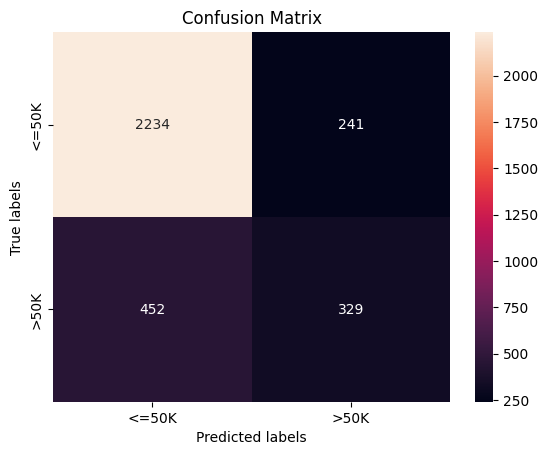

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt     
#Create confusion matrix heatmap with seaborn plot
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['<=50K', '>50K'])
ax.yaxis.set_ticklabels(['<=50K', '>50K'])